### Load OBJ meshed

In [1]:
def load_shape_from_obj(file_path):
    try:
        vertices = []
        faces = []
        with open(file_path) as f:
            for line in f:
                line = line.strip()
                if not line or line.startswith("#"):
                    continue

                parts = line.split()
                if len(parts) == 0:
                    continue

                if parts[0] == "v":
                    vertex = list(map(float, parts[1:]))
                    vertices.append(vertex)
                elif parts[0] == "f":
                    # Handle face indices (OBJ format can have vertex/texture/normal)
                    face = []
                    for part in parts[1:]:
                        # Split by '/' and take the first index (vertex index)
                        vertex_idx = int(part.split("/")[0])
                        face.append(vertex_idx)
                    faces.append(face)

        shape_data = {"vertices": vertices, "faces": faces}

        return shape_data

    except FileNotFoundError:
        print(f"{file_path} not found.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the shape: {e}")
        return None

In [3]:
# Observe SMPL-generated Mesh
obj_path = "./models/smplx/smplx_uv.obj"

print("Start investigating mesh generated from SMPL parameters...")
obj_data = load_shape_from_obj(obj_path)
if obj_data:
    print(
        f"Loaded {len(obj_data['vertices'])} vertices and {len(obj_data['faces'])} faces"
    )
    print(f"First vertex: {obj_data['vertices'][0]}")
    print(f"First face: {obj_data['faces'][0]}")
else:
    print("Failed to load OBJ file")
vertices, faces = obj_data['vertices'], obj_data['faces']

Start investigating mesh generated from SMPL parameters...
Loaded 10475 vertices and 20908 faces
First vertex: [0.062714, 0.2885, -0.009561]
First face: [4, 2, 1]


### Analyze face area of SMPL-X model

In [7]:
def calculate_face_area(vertices, face):
    vertice_dic = {i + 1: vertices[i] for i in range(len(vertices))}
    face_areas = []
    for face in faces:
        v1 = vertice_dic[face[0]]
        v2 = vertice_dic[face[1]]
        v3 = vertice_dic[face[2]]
        # print(v1, v2, v3)
        
        # Calculate the area using the cross product
        a = [v2[i] - v1[i] for i in range(3)]
        b = [v3[i] - v1[i] for i in range(3)]
        cross_product = [
            a[1] * b[2] - a[2] * b[1],
            a[2] * b[0] - a[0] * b[2],
            a[0] * b[1] - a[1] * b[0],
        ]
        area = 0.5 * (sum([cross_product[i] ** 2 for i in range(3)])) ** 0.5
        # print(f"Face {face} area: {area}")
        face_areas.append(area)
    return face_areas
face_areas = calculate_face_area(vertices, faces)

In [8]:
max_area = max(face_areas)
min_area = min(face_areas)
avg_area = sum(face_areas) / len(face_areas)
print(f"Max face area: {max_area}, Min face area: {min_area}, Avg face area: {avg_area}")
print(f"Face area ratio (max/min): {max_area / min_area}, avg/min: {avg_area / min_area}, max/avg: {max_area / avg_area}")

Max face area: 0.0009046242551455202, Min face area: 7.38214218638385e-08, Avg face area: 9.445594724386087e-05
Face area ratio (max/min): 12254.224211693912, avg/min: 1279.5194790217147, max/avg: 9.577208016452516


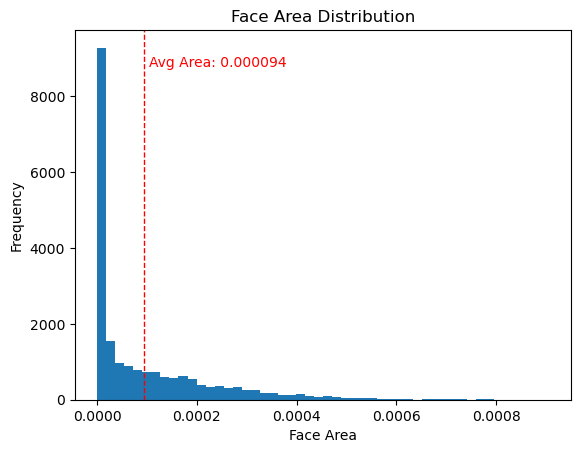

In [16]:
# Analyze the area distribution
import matplotlib.pyplot as plt
plt.hist(face_areas, bins=50)
plt.title("Face Area Distribution")
plt.xlabel("Face Area")
plt.ylabel("Frequency")
plt.axvline(avg_area, color='r', linestyle='dashed', linewidth=1)
plt.text(avg_area*1.1, plt.ylim()[1]*0.9, f'Avg Area: {avg_area:.6f}', color='r')
plt.show()

In [ ]:
# print the number of faces of each bin and its ratio of all faces
import numpy as np
hist, bin_edges = np.histogram(face_areas, bins=50)
total_faces = len(face_areas)
for i in range(len(hist)):
    print(f"Bin {bin_edges[i]:.6f} - {bin_edges[i+1]:.6f}: {hist[i]} faces ({hist[i] / total_faces:.2%})")

Bin 0.000000 - 0.000018: 9276 faces (44.37%)
Bin 0.000018 - 0.000036: 1550 faces (7.41%)
Bin 0.000036 - 0.000054: 965 faces (4.62%)
Bin 0.000054 - 0.000072: 899 faces (4.30%)
Bin 0.000072 - 0.000091: 774 faces (3.70%)
Bin 0.000091 - 0.000109: 728 faces (3.48%)
Bin 0.000109 - 0.000127: 738 faces (3.53%)
Bin 0.000127 - 0.000145: 596 faces (2.85%)
Bin 0.000145 - 0.000163: 576 faces (2.75%)
Bin 0.000163 - 0.000181: 632 faces (3.02%)
Bin 0.000181 - 0.000199: 539 faces (2.58%)
Bin 0.000199 - 0.000217: 397 faces (1.90%)
Bin 0.000217 - 0.000235: 344 faces (1.65%)
Bin 0.000235 - 0.000253: 358 faces (1.71%)
Bin 0.000253 - 0.000271: 306 faces (1.46%)
Bin 0.000271 - 0.000290: 332 faces (1.59%)
Bin 0.000290 - 0.000308: 252 faces (1.21%)
Bin 0.000308 - 0.000326: 254 faces (1.21%)
Bin 0.000326 - 0.000344: 190 faces (0.91%)
Bin 0.000344 - 0.000362: 164 faces (0.78%)
Bin 0.000362 - 0.000380: 118 faces (0.56%)
Bin 0.000380 - 0.000398: 114 faces (0.55%)
Bin 0.000398 - 0.000416: 142 faces (0.68%)
Bin 0.00